In [197]:
# Upload files from local drive

from google.colab import files
files.upload() 

Saving test-data.csv to test-data (1).csv
Saving train-data.csv to train-data (1).csv


{'test-data.csv': b',Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price\n0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,\n1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,\n2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh\n3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,\n4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,\n5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,\n6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,\n7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,\n8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats

In [199]:
# Store dataset as dataframe

train = pd.read_csv("train-data.csv")
test = pd.read_csv("test-data.csv")

train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [200]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [201]:
# Check the rows and columns in each file

print("Train data has", train.shape, "[rows, columns]")
print("Test data has", test.shape, "[rows, columns]")

# Change name of column "mileage"

train.rename(columns = {"Mileage": "Fuel_economy"}, inplace = True)
test.rename(columns = {"Mileage": "Fuel_economy"}, inplace = True)

Train data has (6019, 14) [rows, columns]
Test data has (1234, 13) [rows, columns]


In [202]:
# Maintain only rows with kmpl as unit in column fuel_economy

train = train[train["Fuel_economy"].str.contains("km/kg")==False]
test = test[test["Fuel_economy"].str.contains("km/kg")==False]

# Maintain only the numbers as values

train["Fuel_economy"] = train["Fuel_economy"].str.replace("kmpl","")
test["Fuel_economy"] = test["Fuel_economy"].str.replace("kmpl","")

train["Engine"] = train["Engine"].str.replace("CC","")
test["Engine"] = test["Engine"].str.replace("CC","")

train["Power"] = train["Power"].str.replace("bhp","")
test["Power"] = test["Power"].str.replace("bhp","")

In [203]:
# Convert Lakh Rupees to Euro and create a new column

train["Price_euro"] = train["Price"].apply(lambda x: x*1100)

# Delete price column

train.drop("Price",inplace=True, axis=1)

# Delete new_price column

train.drop("New_Price",inplace=True, axis=1)
test.drop("New_Price",inplace=True, axis=1)

In [204]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Price_euro
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,13750.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4950.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6600.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,19514.0
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3850.0


In [205]:
# Check null values

print("TRAIN NULL VALUES:\n",train.isnull().sum(),"\n______________________\n","TEST NULL VALUES:\n",test.isnull().sum())

TRAIN NULL VALUES:
 Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Fuel_economy          0
Engine               36
Power                36
Seats                42
Price_euro            0
dtype: int64 
______________________
 TEST NULL VALUES:
 Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Fuel_economy          0
Engine               10
Power                10
Seats                11
dtype: int64


In [206]:
# Delete rows with NaN values

train.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
test.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

# Check the rows and columns in each file after deleting rows with NaN values

print("Train data has", train.shape, "[rows, columns].")
print("Test data has", test.shape, "[rows, columns].")
print("")

# Check if there's any NaN values

print("TRAIN NULL VALUES:\n",train.isnull().sum(),"\n___________________\n","TEST NULL VALUES:\n",test.isnull().sum())

Train data has (5909, 13) [rows, columns].
Test data has (1215, 12) [rows, columns].

TRAIN NULL VALUES:
 Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Fuel_economy         0
Engine               0
Power                0
Seats                0
Price_euro           0
dtype: int64 
___________________
 TEST NULL VALUES:
 Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Fuel_economy         0
Engine               0
Power                0
Seats                0
dtype: int64


In [207]:
# Check if columns have the correct type of variables

print("TYPE - TRAIN\n", train.dtypes, "\n________\n","TYPE - TEST\n", test.dtypes)

TYPE - TRAIN
 Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Fuel_economy          object
Engine                object
Power                 object
Seats                float64
Price_euro           float64
dtype: object 
________
 TYPE - TEST
 Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Fuel_economy          object
Engine                object
Power                 object
Seats                float64
dtype: object


In [208]:
# Check each column with "object" type for values with "null" as a string and delete rows

train=train[train["Fuel_economy"].str.contains("null")== False]
train=train[train["Engine"].str.contains("null")== False]
train=train[train["Power"].str.contains("null")== False]

test=test[test["Fuel_economy"].str.contains("null")== False]
test=test[test["Engine"].str.contains("null")== False]
test=test[test["Power"].str.contains("null")== False]

# Convert to float

train["Fuel_economy"] = train.Fuel_economy.astype(float)
test["Fuel_economy"] = test.Fuel_economy.astype(float)

train["Engine"] = train.Engine.astype(float)
test["Engine"] = test.Engine.astype(float)

train["Power"] = train.Power.astype(float)
test["Power"] = test.Power.astype(float)

In [209]:
# Check if columns have the correct type of variables

print("TYPE - TRAIN\n", train.dtypes, "\n________\n","TYPE - TEST\n", test.dtypes)

TYPE - TRAIN
 Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Fuel_economy         float64
Engine               float64
Power                float64
Seats                float64
Price_euro           float64
dtype: object 
________
 TYPE - TEST
 Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Fuel_economy         float64
Engine               float64
Power                float64
Seats                float64
dtype: object


In [210]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Fuel_economy,Engine,Power,Seats,Price_euro
count,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000
mean,3013.686585,2013.475805,5.834902e+04,18.206856,1631.839332,113.827634,5.286551,10640.771483
std,1737.960240,3.170718,9.265556e+04,4.288795,601.822651,53.903495,0.806790,12421.213368
min,1.000000,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,484.000000
25%,1508.500000,2012.000000,3.328800e+04,15.260000,1198.000000,78.000000,5.000000,3949.000000
50%,3017.000000,2014.000000,5.240000e+04,18.200000,1497.000000,98.600000,5.000000,6325.000000
75%,4518.500000,2016.000000,7.245750e+04,21.100000,1991.000000,139.040000,5.000000,11275.000000
max,6018.000000,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,176000.000000


In [211]:
# Delete rows where train or test["Fuel_economy"] == 0

train.drop(train.index[train['Fuel_economy'] == 0], inplace = True)
test.drop(test.index[test['Fuel_economy'] == 0], inplace = True)

In [212]:
# Verify how many names there's in train data

train["Name"].value_counts()

Mahindra XUV500 W8 2WD                   49
Maruti Swift VDI                         45
Maruti Swift Dzire VDI                   34
Honda City 1.5 S MT                      34
Hyundai i10 Sportz                       30
                                         ..
BMW 3 Series GT 320d Luxury Line          1
Mercedes-Benz R-Class R350 CDI 4MATIC     1
Hyundai Creta 1.6 SX Option Executive     1
BMW 3 Series 320d Luxury Plus             1
Hyundai i20 2015-2017 1.2 Magna           1
Name: Name, Length: 1776, dtype: int64

In [213]:
# Verify how many names there's in test data

test["Name"].value_counts()

Maruti Alto LXi                                 9
Volkswagen Polo 1.2 MPI Highline                8
Honda City 1.5 V MT                             8
Maruti Swift Dzire VDI                          8
Hyundai i10 Magna                               7
                                               ..
Volkswagen Polo 1.5 TDI Comfortline             1
Nissan Sunny 2011-2014 XL AT Special Edition    1
Maruti Wagon R VXI AMT Opt                      1
Hyundai Xcent 1.2 Kappa AT SX Option            1
Mahindra Bolero SLX                             1
Name: Name, Length: 735, dtype: int64

In [214]:
# Verify names with only one car

counts=train["Name"].value_counts()
one_name=set(counts[counts==1].index.values)

result=train[train.Name.isin(one_name)].index
result

Int64Index([  18,   25,   37,   41,   42,   45,   46,   47,   58,   70,
            ...
            5963, 5968, 5970, 5977, 5980, 5990, 5993, 5998, 5999, 6016],
           dtype='int64', length=781)

In [215]:
# Verify names with only one car

counts=test["Name"].value_counts()
one_name=set(counts[counts==1].index.values)

result=test[test.Name.isin(one_name)].index
result

Int64Index([   2,   11,   12,   14,   16,   17,   18,   21,   24,   25,
            ...
            1208, 1209, 1210, 1212, 1213, 1215, 1217, 1220, 1225, 1233],
           dtype='int64', length=501)

In [216]:
# Delete column name

train.drop(columns="Name", inplace=True)
test.drop(columns="Name", inplace=True)

In [217]:
# Delete first column with incorrect indexes

train.drop(columns=train.columns[0],axis=1,inplace=True)
test.drop(columns=test.columns[0],axis=1,inplace=True)

# Reset the index since some rows were deleted

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [218]:
# Check the rows and columns in each file after deleting rows

print("Train data has", train.shape, "[rows, columns].")
print("Test data has", test.shape, "[rows, columns].")

Train data has (5779, 11) [rows, columns].
Test data has (1187, 10) [rows, columns].


In [219]:
# Descriptive Statistics 

train.describe()

,Year,Kilometers_Driven,Fuel_economy,Engine,Power,Seats,Price_euro
count,5779.000000,5.779000e+03,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000
mean,2013.479149,5.835925e+04,18.295070,1628.925074,113.691476,5.287939,10576.175463
std,3.169719,9.284468e+04,4.107155,599.172172,53.834573,0.808495,12352.785556
min,1998.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,484.000000
25%,2012.000000,3.342000e+04,15.290000,1198.000000,78.000000,5.000000,3949.000000
50%,2014.000000,5.238300e+04,18.200000,1496.000000,98.600000,5.000000,6325.000000
75%,2016.000000,7.246700e+04,21.100000,1991.000000,138.100000,5.000000,11093.500000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,176000.000000


In [220]:
test.describe()

,Year,Kilometers_Driven,Fuel_economy,Engine,Power,Seats
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,2013.503791,58099.955350,18.346521,1599.800337,110.740830,5.295703
std,3.089821,35546.730977,4.003990,564.473279,51.603221,0.834141
min,2000.000000,1000.000000,7.940000,624.000000,34.200000,2.000000
25%,2011.000000,33572.500000,15.300000,1198.000000,75.940000,5.000000
50%,2014.000000,54000.000000,18.490000,1493.000000,93.700000,5.000000
75%,2016.000000,74000.000000,21.100000,1968.000000,130.000000,5.000000
max,2019.000000,350000.000000,28.400000,5998.000000,616.000000,10.000000


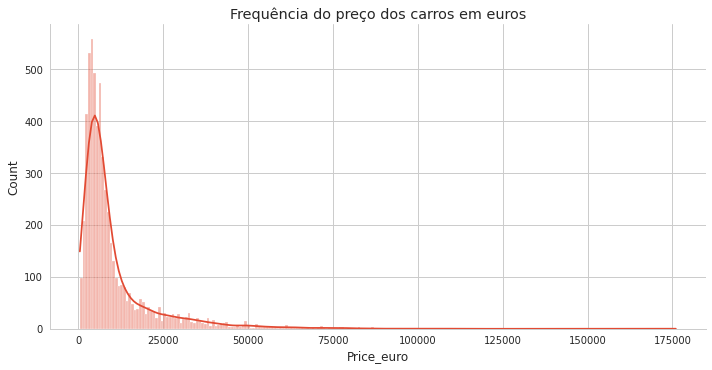

In [221]:
# Price_euro frequency in a histogram

sns.displot(train["Price_euro"],kde=True, alpha=0.4,aspect=16/8).set(title="Frequência do preço dos carros em euros")

[Text(0.5, 1.0, 'Distribuição do preço dos carros em euros')]

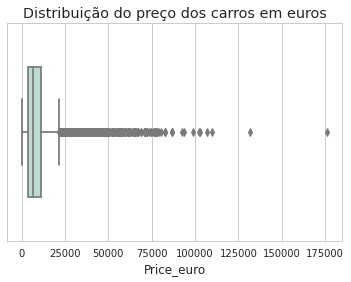

In [222]:
sns.boxplot(x=train['Price_euro'],palette=("Pastel2"),width=0.6).set(title="Distribuição do preço dos carros em euros")

In [223]:
# Delete severe outliers

outliers=train[train["Price_euro"]>125000].index

train.drop(outliers,axis=0, inplace=True)


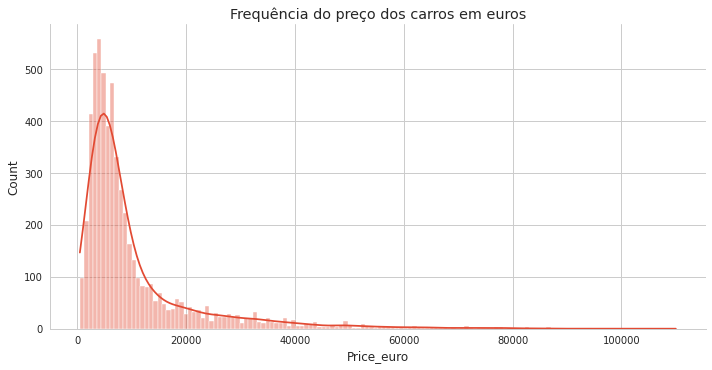

In [224]:
# Price_euro frequency in a histogram

sns.displot(train["Price_euro"],kde=True, alpha=0.4,aspect=16/8).set(title="Frequência do preço dos carros em euros")

[Text(0.5, 1.0, 'Distribuição do preço dos carros em euros')]

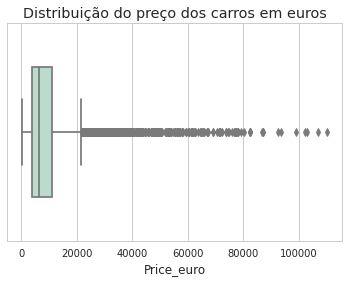

In [225]:
sns.boxplot(x=train['Price_euro'],palette=("Pastel2"),width=0.6).set(title="Distribuição do preço dos carros em euros")

[Text(0.5, 1.0, 'Frequência dos anos de produção dos carros')]

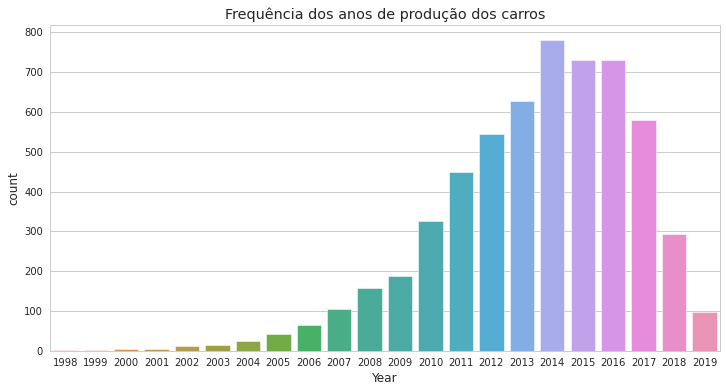

In [226]:
# Check number of cars from x year

plt.figure(figsize=(12, 6))
sns.countplot(x="Year", data=train).set(title="Frequência dos anos de produção dos carros")

[Text(0.5, 1.0, 'Distribuição do preço por ano')]

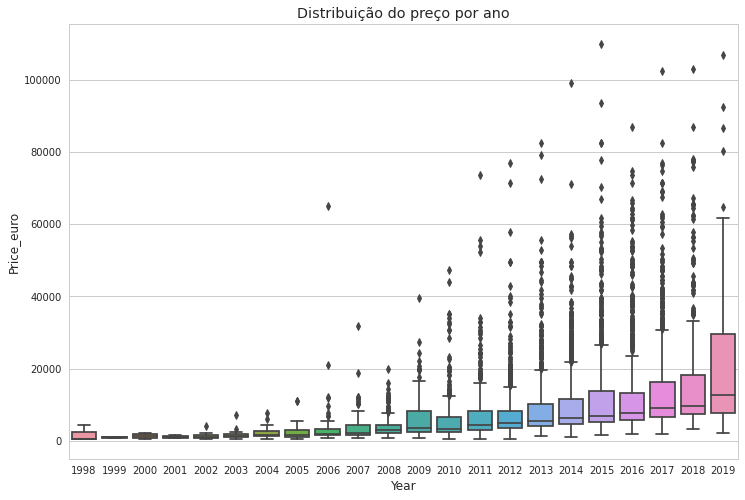

In [227]:
# Distribution of price per year

plt.figure(figsize=(12, 8))
sns.boxplot(x="Year", y="Price_euro", data=train).set(title="Distribuição do preço por ano")

In [228]:
# Check existence of correlation

scipy.stats.spearmanr(train["Price_euro"], train["Year"])

SpearmanrResult(correlation=0.4738411813239896, pvalue=0.0)

In [229]:
# Descriptive analysis of price per year

ppy=train[["Year","Price_euro"]]
yearp=ppy.groupby(["Year"], as_index = True).describe()
  
yearp

Price_euro                              ...                             
          count          mean           std  ...      50%       75%       max
Year                                         ...                             
1998        3.0   1789.333333   2166.087794  ...    583.0   2436.50    4290.0
1999        2.0    918.500000    101.116270  ...    918.5    954.25     990.0
2000        4.0   1292.500000    730.348091  ...   1210.0   1773.75    2145.0
2001        4.0   1072.500000    377.061003  ...    962.5   1223.75    1595.0
2002       11.0   1401.000000    988.731409  ...   1100.0   1551.00    4015.0
2003       14.0   1867.642857   1688.469977  ...   1430.0   1820.50    7150.0
2004       25.0   2213.200000   1768.453138  ...   1540.0   2750.00    7810.0
2005       42.0   2520.047619   2337.303898  ...   1485.0   3118.50   11000.0
2006       66.0   4040.833333   8276.291653  ...   1980.0   3176.25   64900.0
2007      104.0   3793.413462   4151.842917  ...   2200.0   4427.50   31900.0
2008      157.0   4047.929936   3274.684812  ...   2860.0   4400.00   19800.0
2009      189.0   5830.756614   5512.501224  ...   3421.0   8250.00   39600.0
2010      325.0   6040.455385   6793.997025  ...   3300.0   6545.00   47201.0
2011      448.0   7249.417411   7787.253443  ...   4235.0   8332.50   73700.0
2012      544.0   8036.288603   8428.781121  ...   4950.0   8250.00   77000.0
2013      628.0   9672.117834  10149.760470  ...   5615.5  10326.25   82500.0
2014      780.0  10637.507692  10405.821089  ...   6325.0  11563.75   99000.0
2015      729.0  12383.978052  13276.316941  ...   6875.0  13750.00  110000.0
2016      731.0  12839.919289  13125.736487  ...   7689.0  13200.00   86900.0
2017      580.0  14956.472414  14733.516252  ...   9020.0  16277.25  102300.0
2018      293.0  17384.354949  17765.342864  ...   9735.0  18172.00  103037.0
2019       98.0  20993.163265  20509.340895  ...  12622.5  29447.00  106777.0

[22 rows x 8 columns]

[Text(0.5, 1.0, 'Distribuição dos km percorridos')]

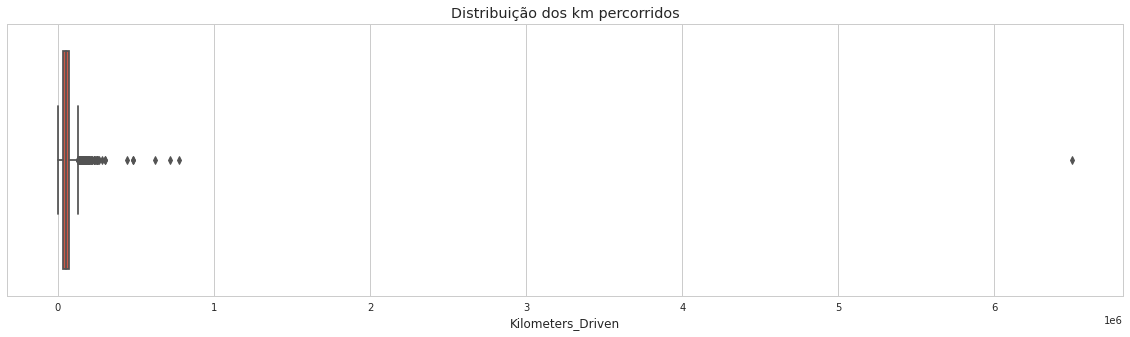

In [230]:
# Km driven distribution

plt.figure(figsize=(20, 5))
sns.boxplot(x="Kilometers_Driven", data=train).set(title="Distribuição dos km percorridos")

In [231]:
train["Kilometers_Driven"].describe()

count    5.777000e+03
mean     5.837400e+04
std      9.285720e+04
min      1.710000e+02
25%      3.345000e+04
50%      5.239800e+04
75%      7.246900e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

In [232]:
# Find the outliers 

outlier=train[train["Kilometers_Driven"]>400000].index
outlier

Int64Index([321, 339, 1785, 2234, 2701, 2962, 4308], dtype='int64')

[Text(0.5, 1.0, 'Distribuição dos km percorridos')]

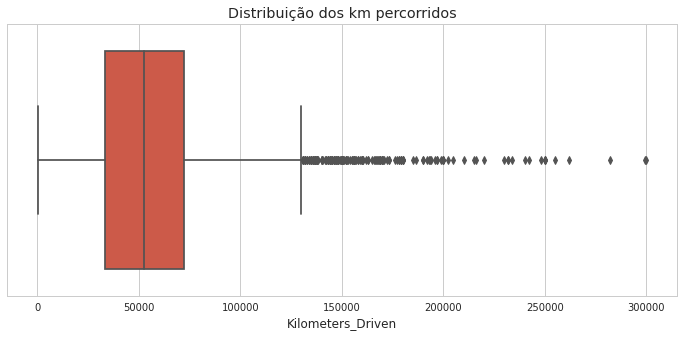

In [233]:
# Drop the outlier

train.drop(outlier, inplace = True)

# Reset index

train = train.reset_index(drop=True)

# Verify the km driven distribution

plt.figure(figsize=(12, 5))
sns.boxplot(x="Kilometers_Driven", data=train).set(title="Distribuição dos km percorridos")

[Text(0.5, 1.0, 'Relação entre km percorridos x preço')]

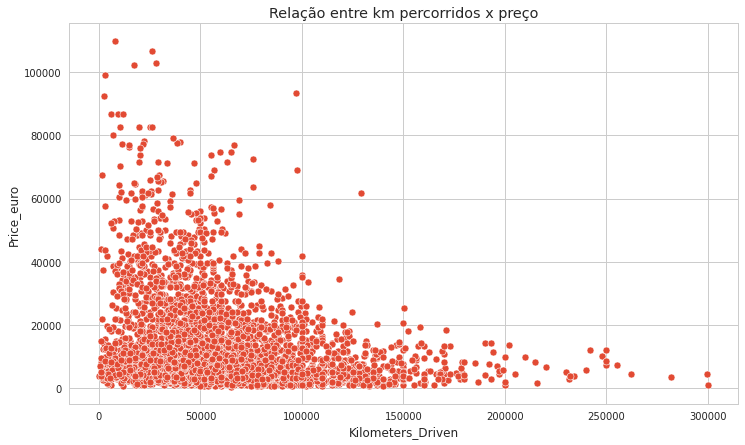

In [234]:
# Relation between price and km driven

plt.figure(figsize=(12, 7))
sns.scatterplot(x="Kilometers_Driven", y="Price_euro", data=train).set(title="Relação entre km percorridos x preço")

In [235]:
# Check existence of correlation

scipy.stats.pearsonr(train["Kilometers_Driven"], train["Price_euro"])

(-0.1785534052784447, 1.5327397680772974e-42)

[Text(0.5, 1.0, 'Distribuição da economia do combustível')]

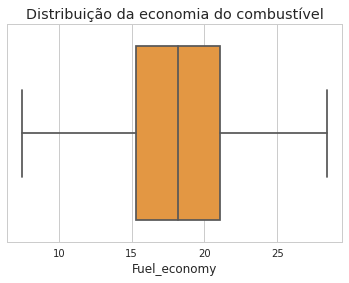

In [236]:
# Fuel economy distribution

sns.boxplot(x="Fuel_economy", data=train, palette="YlOrBr").set(title="Distribuição da economia do combustível")

In [237]:
# Check descriptive values

train["Fuel_economy"].describe()

count    5770.000000
mean       18.297825
std         4.106465
min         7.500000
25%        15.290000
50%        18.200000
75%        21.100000
max        28.400000
Name: Fuel_economy, dtype: float64

[Text(0.5, 1.0, 'Relação entre o preço e a economia do combustível')]

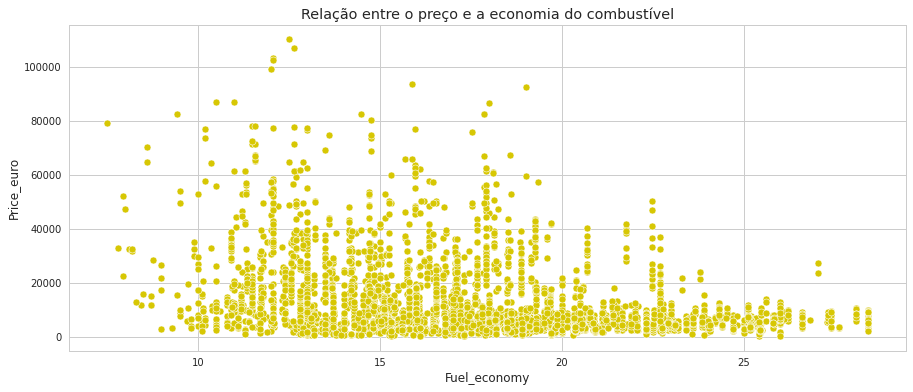

In [238]:
# Relation between price and fuel economy

plt.figure(figsize=(15, 6))
sns.scatterplot(x="Fuel_economy", y="Price_euro", data=train, color="y").set(title="Relação entre o preço e a economia do combustível")

In [239]:
# Check existence of correlation

scipy.stats.pearsonr(train["Fuel_economy"], train["Price_euro"])

(-0.337133013654978, 2.3676115051963605e-153)

[Text(0.5, 1.0, 'Distribuição da capacidade do motor')]

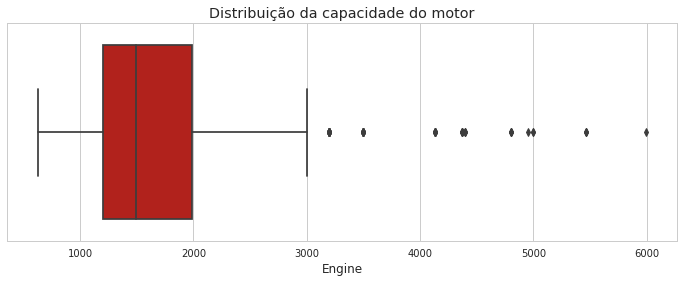

In [240]:
# Engine capacity distribution

plt.figure(figsize=(12, 4))
sns.boxplot(x="Engine", data=train, color="r").set(title="Distribuição da capacidade do motor")

[Text(0.5, 1.0, 'Relação entre o preço e a capacidade do motor')]

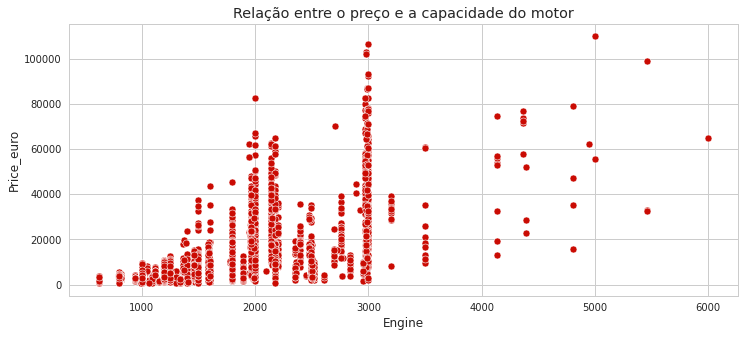

In [241]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x="Engine", y="Price_euro", data=train, color="r").set(title="Relação entre o preço e a capacidade do motor")

In [242]:
# Check existence of correlation

scipy.stats.pearsonr(train["Engine"], train["Price_euro"])

(0.6586968893343816, 0.0)

[Text(0.5, 1.0, 'Distribuição da potência')]

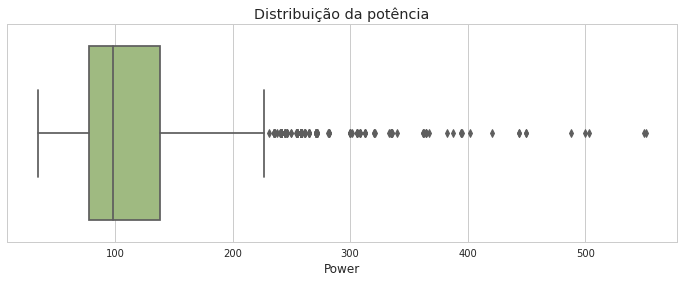

In [243]:
# Variable Power distribution

plt.figure(figsize=(12, 4))
sns.boxplot(x="Power", data=train, color="g").set(title="Distribuição da potência")

[Text(0.5, 1.0, 'Relação entre o preço e a potência')]

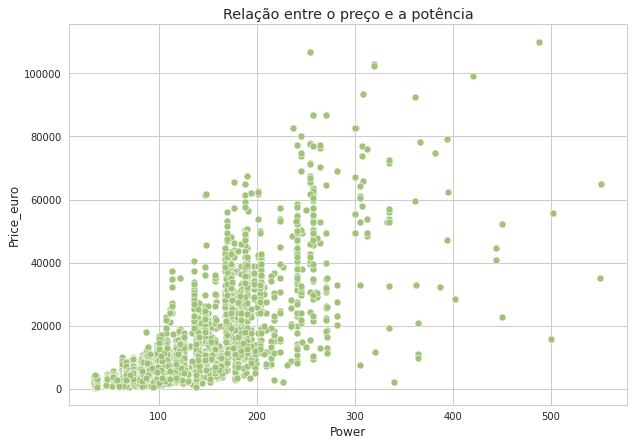

In [244]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Power", y="Price_euro", data=train, color="g").set(title="Relação entre o preço e a potência")

In [245]:
# Check existence of correlation

scipy.stats.pearsonr(train["Power"], train["Price_euro"])

(0.7780303893163311, 0.0)

[Text(0.5, 1.0, 'Frequência de lugares no carro')]

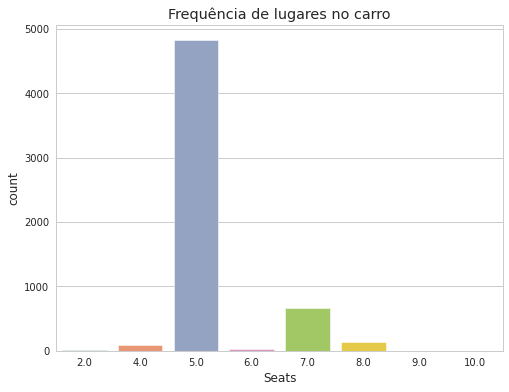

In [246]:
# Frequency of seats

plt.figure(figsize=(8, 6))
sns.countplot(x="Seats", data=train, palette="Set2").set(title="Frequência de lugares no carro")

In [247]:
# Descriptive analysis of price per year

pps=train[["Seats","Price_euro"]]
seat=pps.groupby(["Seats"], as_index = True).describe()
  
seat

Price_euro                              ...                             
           count          mean           std  ...      50%       75%       max
Seats                                         ...                             
2.0         12.0  62094.083333  27446.600738  ...  60797.0  75889.00  110000.0
4.0         93.0  24071.075269  24757.637199  ...  18700.0  44550.00   86900.0
5.0       4828.0   9385.278376  10775.167883  ...   5797.0   9350.00  106777.0
6.0         29.0  10854.344828   8981.895569  ...   7150.0  11396.00   44000.0
7.0        668.0  16400.868263  13741.803424  ...  11825.0  19492.00   86900.0
8.0        133.0   8248.263158   4866.987420  ...   6930.0  10395.00   24805.0
9.0          3.0   4895.000000    360.659119  ...   4950.0   5087.50    5225.0
10.0         4.0   4922.500000   1150.626641  ...   4895.0   5843.75    6050.0

[8 rows x 8 columns]

[Text(0.5, 1.0, 'Distribuição do preço por número de lugares')]

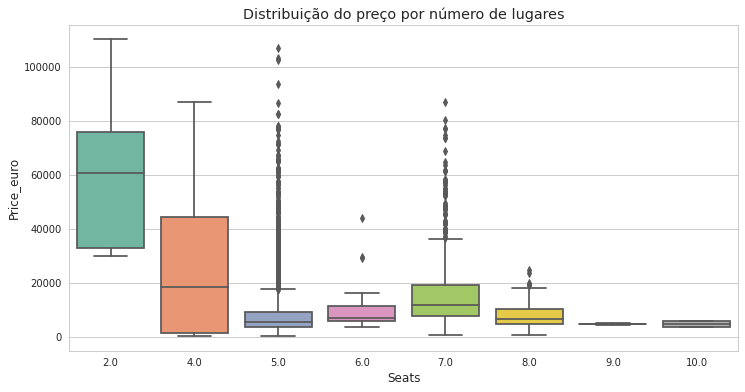

In [248]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=train["Seats"],y=train["Price_euro"], palette="Set2").set(title='Distribuição do preço por número de lugares')

In [249]:
# Check existence of correlation

scipy.stats.spearmanr(train["Price_euro"],train["Seats"])

SpearmanrResult(correlation=0.2223625121560391, pvalue=1.442740731043546e-65)

In [250]:
# Number of cars to be sold in certain city

train["Location"].value_counts()

Mumbai        755
Hyderabad     703
Kochi         635
Coimbatore    626
Pune          577
Delhi         532
Kolkata       517
Chennai       469
Jaipur        399
Bangalore     342
Ahmedabad     215
Name: Location, dtype: int64

In [251]:
train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Price_euro
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,13750.0
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4950.0
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6600.0
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19514.0
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3850.0
...,...,...,...,...,...,...,...,...,...,...,...
5765,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5225.0
5766,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4400.0
5767,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,3190.0
5768,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2915.0


[Text(0.5, 1.0, 'Boxplot: Preço dos carros por cidade')]

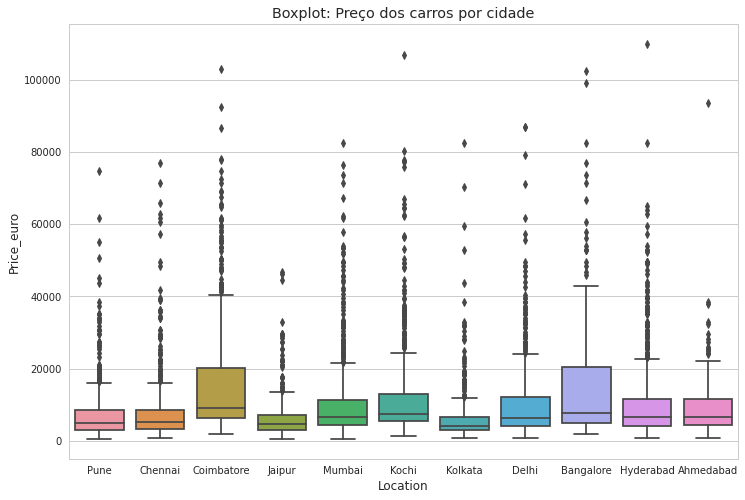

In [252]:
# Price distribution per location

plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Price_euro', data=train).set(title='Boxplot: Preço dos carros por cidade')

In [253]:
# Find the mean price for each location

lop=train[["Location","Price_euro"]]
mean_location = lop.groupby(["Location"], as_index = True).mean()
  
mean_location

,Price_euro
Location,
Ahmedabad,9243.632558
Bangalore,14874.830409
Chennai,8586.144989
Coimbatore,16498.506390
Delhi,10672.894737
Hyderabad,10759.689900
Jaipur,6515.060150
Kochi,12423.209449
Kolkata,6274.106383


In [254]:
# Encode variable "Location" in train data

Location = train[["Location"]]
Location = pd.get_dummies(Location,drop_first=False)
Location=Location.astype(int)

# Merge with main dataframe

train=train.join(Location)
train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Price_euro,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,13750.0,0,0,0,0,0,0,0,0,0,0,1
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4950.0,0,0,1,0,0,0,0,0,0,0,0
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6600.0,0,0,1,0,0,0,0,0,0,0,0
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19514.0,0,0,0,1,0,0,0,0,0,0,0
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3850.0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5225.0,0,0,0,0,1,0,0,0,0,0,0
5766,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4400.0,0,0,0,0,0,0,1,0,0,0,0
5767,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,3190.0,0,0,0,0,0,0,1,0,0,0,0
5768,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2915.0,0,0,0,0,0,0,0,0,1,0,0


In [255]:
# Encode variable "Location" in test data

Location = test[["Location"]]
Location = pd.get_dummies(Location,drop_first=False)
Location=Location.astype(int)

# Merge with main dataframe

test=test.join(Location)
test

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,0,0,0,1,0,0,0,0,0,0,0
1,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,0,0,0,0,0,0,0,0,0,1,0
2,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,0,0,0,0,0,0,0,0,0,1,0
3,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,0,0,0,1,0,0,0,0,0,0,0
4,Pune,2015,59000,Diesel,Automatic,First,12.55,2982.0,168.70,7.0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,0,0,0,0,0,1,0,0,0,0,0
1183,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,1,0
1184,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,0,0,0,0,0,0,0,0,1,0,0
1185,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,0,1


In [256]:
# Analyze Fuel type variable

train["Fuel_Type"].value_counts()

Diesel    3129
Petrol    2641
Name: Fuel_Type, dtype: int64

[Text(0.5, 1.0, 'Frequência dos tipos de combustível')]

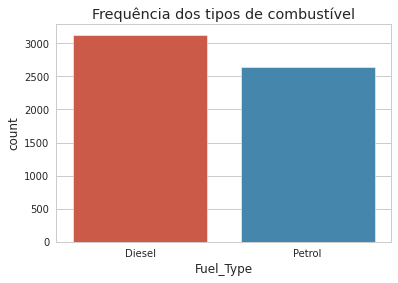

In [257]:
# Fuel type distribution

sns.countplot(x='Fuel_Type', data=train).set(title='Frequência dos tipos de combustível')

[Text(0.5, 1.0, 'Distribuição do preço por tipo de combustível')]

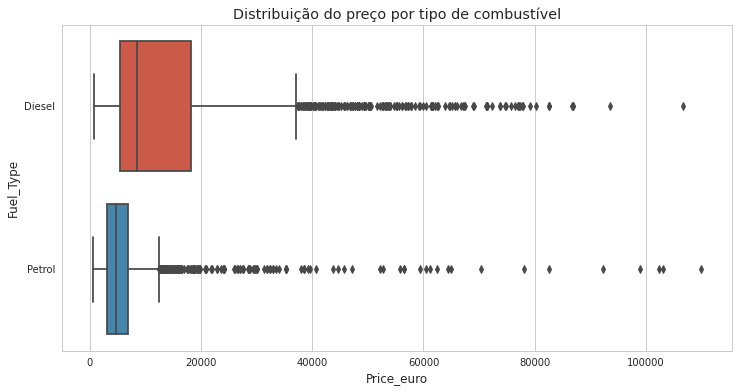

In [258]:
# Price distribution per fuel type

plt.figure(figsize=(12, 6))
sns.boxplot(x=train["Price_euro"],y=train["Fuel_Type"], orient="h").set(title='Distribuição do preço por tipo de combustível')

In [259]:
# Descriptive analysis of price per fuel type

ftp=train[["Fuel_Type","Price_euro"]]
price_fuel = ftp.groupby(["Fuel_Type"], as_index = True).describe()
  
price_fuel

Price_euro                              ...                           
               count          mean           std  ...     50%      75%       max
Fuel_Type                                         ...                           
Diesel        3129.0  14078.365292  13755.238625  ...  8525.0  18150.0  106777.0
Petrol        2641.0   6303.145778   7718.099972  ...  4675.0   6820.0  110000.0

[2 rows x 8 columns]

In [260]:
# Encode variable "Fuel_type" in train data

Fuel=train[["Fuel_Type"]]
Fuel=pd.get_dummies(Fuel,drop_first=False)
Fuel=Fuel.astype(int)

# Merge with main dataframe

train=train.join(Fuel)
train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Price_euro,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,13750.0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4950.0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6600.0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19514.0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3850.0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5225.0,0,0,0,0,1,0,0,0,0,0,0,1,0
5766,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4400.0,0,0,0,0,0,0,1,0,0,0,0,1,0
5767,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,3190.0,0,0,0,0,0,0,1,0,0,0,0,1,0
5768,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2915.0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [261]:
# Encode variable "Fuel_type" in test data

Fuel=test[["Fuel_Type"]]
Fuel=pd.get_dummies(Fuel,drop_first=False)
Fuel=Fuel.astype(int)

# Merge with main dataframe

test=test.join(Fuel)
test

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol
0,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,Pune,2015,59000,Diesel,Automatic,First,12.55,2982.0,168.70,7.0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,0,0,0,0,0,1,0,0,0,0,0,1,0
1183,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,1,0,0,1
1184,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,0,0,0,0,0,0,0,0,1,0,0,1,0
1185,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [262]:
# Number of cars with manual or automatic transmission

train["Transmission"].value_counts()

Manual       4094
Automatic    1676
Name: Transmission, dtype: int64

[Text(0.5, 1.0, 'Frequência dos tipos de transmissão')]

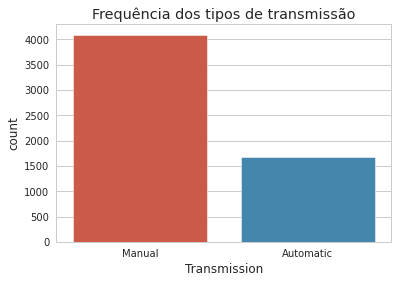

In [263]:
# Frequency of cars with manual and automatic transmission

sns.countplot(x='Transmission', data=train).set(title='Frequência dos tipos de transmissão')

In [264]:
# Descriptive analysis of price per transmission

tpp=train[["Transmission","Price_euro"]]
transm = tpp.groupby(["Transmission"], as_index = False).describe()
  
transm

Price_euro                              ...                             
       count          mean           std  ...      50%       75%       max
0     1676.0  21614.553699  16983.856864  ...  17600.0  29700.00  110000.0
1     4094.0   5977.484367   3884.190880  ...   5170.0   7389.25   39402.0

[2 rows x 8 columns]

In [265]:
# Encode variable "Transmission" in train data

Transmission=train[["Transmission"]]
Transmission=pd.get_dummies(Transmission,drop_first=False)
Transmission=Transmission.astype(int)

# Merge with main dataframe

train=train.join(Transmission)
train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Price_euro,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,13750.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4950.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6600.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19514.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3850.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5225.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5766,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4400.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5767,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,3190.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5768,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2915.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


[Text(0.5, 1.0, 'Distribuição do preço por transmissão')]

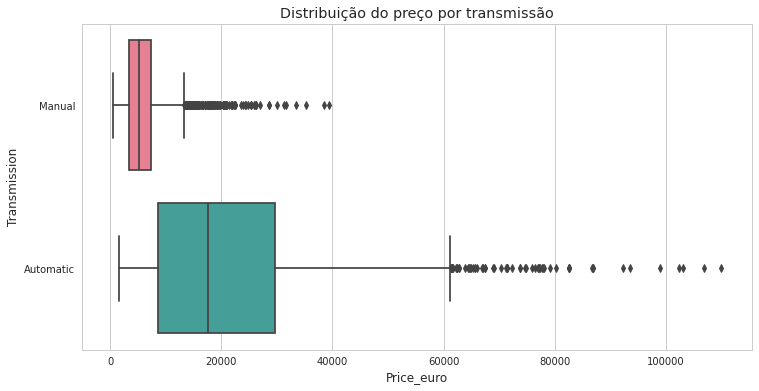

In [266]:
# Price distribution per transmission

plt.figure(figsize=(12, 6))
sns.boxplot(x=train["Price_euro"],y=train["Transmission"], orient="h", palette="husl").set(title='Distribuição do preço por transmissão')

In [267]:
# Encode variable "Transmission" in test data

Transmission=test[["Transmission"]]
Transmission=pd.get_dummies(Transmission,drop_first=False)
Transmission=Transmission.astype(int)

# Merge with main dataframe

test=test.join(Transmission)
test

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,Pune,2015,59000,Diesel,Automatic,First,12.55,2982.0,168.70,7.0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1183,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1184,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1185,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [268]:
# Replace string for integers - represents number of owners

train.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train["Owner_Type"]=train["Owner_Type"].astype(int)
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Price_euro,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,13750.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4950.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6600.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,19514.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,Jaipur,2013,86999,Diesel,Manual,1,23.08,1461.0,63.10,5.0,3850.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [269]:
# Replace string for integers - represents number of owners

test.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test["Owner_Type"]=test["Owner_Type"].astype(int)
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Fuel_economy,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,Coimbatore,2013,54493,Petrol,Manual,2,24.70,796.0,47.30,5.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,Mumbai,2017,34000,Diesel,Manual,1,13.68,2393.0,147.80,7.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,Mumbai,2014,29000,Petrol,Manual,1,18.50,1197.0,82.85,5.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,Coimbatore,2016,85609,Diesel,Manual,2,16.00,2179.0,140.00,7.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,Pune,2015,59000,Diesel,Automatic,1,12.55,2982.0,168.70,7.0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


1    4757
2     906
3     100
4       7
Name: Owner_Type, dtype: int64

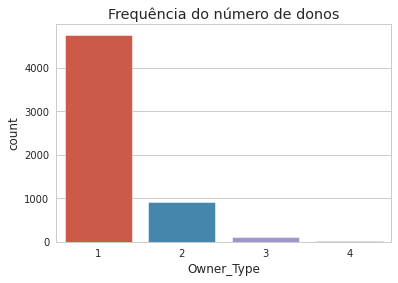

In [270]:
# Frequency of variable owner type
sns.countplot(x='Owner_Type', data=train).set(title='Frequência do número de donos')

train["Owner_Type"].value_counts()

[Text(0.5, 1.0, 'Distribuição do preço por número de donos')]

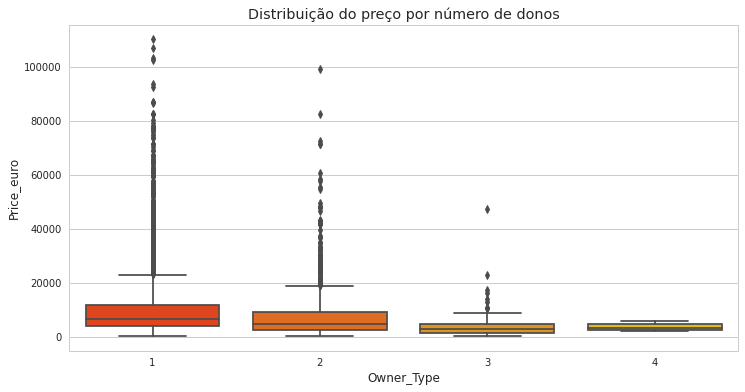

In [271]:
# Price distribution per number of owners

plt.figure(figsize=(12, 6))
sns.boxplot(x=train["Owner_Type"],y=train["Price_euro"], palette="autumn").set(title='Distribuição do preço por número de donos')

In [272]:
# Descriptive analysis of price per number of owners

ppo=train[["Owner_Type","Price_euro"]]
owner=ppo.groupby(["Owner_Type"], as_index = True).describe()
  
owner

Price_euro                              ...                            
                count          mean           std  ...     50%       75%       max
Owner_Type                                         ...                            
1              4757.0  11030.800925  12329.679468  ...  6600.0  11825.00  110000.0
2               906.0   8543.102649  10547.816899  ...  4950.0   9350.00   99000.0
3               100.0   4567.750000   5808.158115  ...  3217.5   4826.25   47201.0
4                 7.0   3923.857143   1506.527733  ...  3575.0   5005.00    6050.0

[4 rows x 8 columns]

In [273]:
# Conclude if types are finally int or float

train.dtypes

Location                   object
Year                        int64
Kilometers_Driven           int64
Fuel_Type                  object
Transmission               object
Owner_Type                  int64
Fuel_economy              float64
Engine                    float64
Power                     float64
Seats                     float64
Price_euro                float64
Location_Ahmedabad          int64
Location_Bangalore          int64
Location_Chennai            int64
Location_Coimbatore         int64
Location_Delhi              int64
Location_Hyderabad          int64
Location_Jaipur             int64
Location_Kochi              int64
Location_Kolkata            int64
Location_Mumbai             int64
Location_Pune               int64
Fuel_Type_Diesel            int64
Fuel_Type_Petrol            int64
Transmission_Automatic      int64
Transmission_Manual         int64
dtype: object

In [274]:
# Defining the variables

import statsmodels.api as sm

X = train.drop(["Price_euro","Location","Fuel_Type","Transmission"], axis=1)
y = train['Price_euro']

# Adding the constant term

X = sm.add_constant(X)

# Split the data into train and test for the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [275]:
# Performing the regression and fitting the model

result = sm.OLS(y, X).fit()
  
# Summary table

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Price_euro   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     798.1
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        15:35:52   Log-Likelihood:                -58675.
No. Observations:                5770   AIC:                         1.174e+05
Df Residuals:                    5750   BIC:                         1.175e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.54

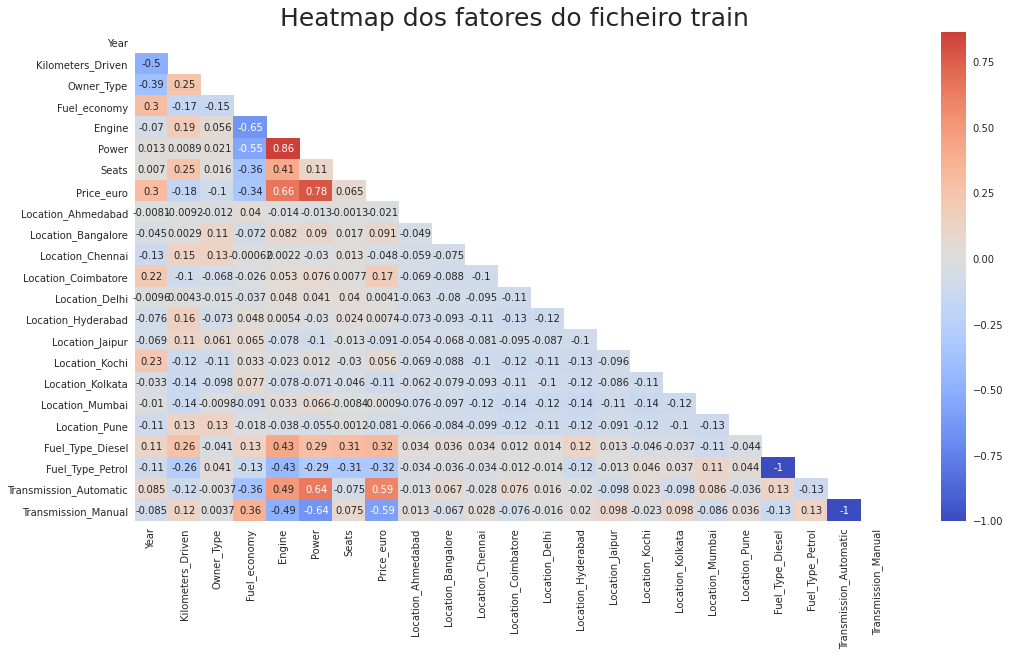

In [276]:
# Correlation between variables

plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (17,9))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), cmap="coolwarm", annot=True, mask=mask, center = 0 );
plt.title("Heatmap dos fatores do ficheiro train", fontsize = 25);

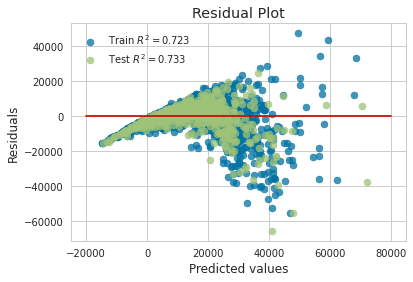

In [277]:
# Create the residuals plot to check homocedasticity

from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = Ridge()

visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer

plt.xlabel("Predicted values")
plt.ylabel("Residuals")

p = sns.lineplot(x=[-20000,80000],y=[0,0],color="r")
p = plt.title("Residual Plot")

In [278]:
# Linear regression model and its accuracy 

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.7226241903673525
Accuracy on Testing set:  0.7328948083747149


In [279]:
# Linear regression metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3906.6639564803822
Mean Squared Error: 41076402.65186462
Root Mean Squared Error: 6409.087505399238


In [280]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Training set:  0.9882334833940002
Accuracy on Testing set:  0.874265623519229


In [281]:
# Change number of estimators to 2

rf_reg = RandomForestRegressor(n_estimators=2)
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Training set:  0.9563132325115818
Accuracy on Testing set:  0.8495873092357844


In [282]:
# Change number of estimators to 200

rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Training set:  0.9881195501033879
Accuracy on Testing set:  0.8808547712241149


In [283]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest

tree = rf_reg.estimators_[5]
export_graphviz(tree, out_file = "tree.dot" , rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")

In [284]:
# Limit depth of tree to 3 levels

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = "small_tree.dot", feature_names=list(X.columns), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file("small_tree.dot")
graph.write_png("small_tree.png")

In [286]:
# Random forest regressor metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1649.8994562219746
Mean Squared Error: 18322584.302713696
Root Mean Squared Error: 4280.488792499485
